In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()


spotify = pd.read_csv("reviews.csv")
spotify.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Transform features
X = spotify.Review
X_tfidf = vectorizer.fit_transform(X)

# create target
y = spotify.Rating



In [22]:
X, y

(0        Great music service, the audio is high quality...
 1        Please ignore previous negative rating. This a...
 2        This pop-up "Get the best Spotify experience o...
 3          Really buggy and terrible to use as of recently
 4        Dear Spotify why do I get songs that I didn't ...
                                ...                        
 61589    Even though it was communicated that lyrics fe...
 61590    Use to be sooo good back when I had it, and wh...
 61591    This app would be good if not for it taking ov...
 61592    The app is good hard to navigate and won't jus...
 61593    Its good but sometimes it doesnt load the musi...
 Name: Review, Length: 61594, dtype: object,
 0        5
 1        5
 2        4
 3        1
 4        1
         ..
 61589    1
 61590    1
 61591    2
 61592    2
 61593    4
 Name: Rating, Length: 61594, dtype: int64)

In [23]:
X.iloc[3], y.iloc[3]

('Really buggy and terrible to use as of recently', 1)

In [27]:
print(X_tfidf)

  (0, 20300)	0.29839872338486056
  (0, 8632)	0.3349739321801587
  (0, 16535)	0.38975023661742114
  (0, 22586)	0.18742283720051933
  (0, 1589)	0.20683996887506798
  (0, 22327)	0.18349214034682718
  (0, 21151)	0.08595893130798461
  (0, 6917)	0.23180675716722407
  (0, 1925)	0.09813415367489683
  (0, 1714)	0.18213831697797978
  (0, 16495)	0.24652607496793788
  (0, 9909)	0.33432929418726837
  (0, 11108)	0.22114672439592217
  (0, 2318)	0.28604361224633246
  (0, 20806)	0.16655769907415158
  (0, 18506)	0.2405111319602623
  (0, 13676)	0.11251651472613956
  (0, 9332)	0.17266421204012128
  (1, 19781)	0.24527162110941403
  (1, 8253)	0.33233393830500035
  (1, 11161)	0.08820218259575711
  (1, 9069)	0.2409002224431391
  (1, 20265)	0.2977267546571021
  (1, 20918)	0.12377975432174719
  (1, 16715)	0.317299090112871
  :	:
  (61593, 15578)	0.15150423698238974
  (61593, 20838)	0.13516097397498772
  (61593, 18351)	0.19322542417523417
  (61593, 23332)	0.28081920582642544
  (61593, 10897)	0.16926020340649692


In [25]:
import pandas as pd

tfidf_tokens = vectorizer.get_feature_names_out()

result = pd.DataFrame(
    data=X_tfidf.toarray(),
    columns=tfidf_tokens
)

result

MemoryError: Unable to allocate 11.0 GiB for an array with shape (61594, 24035) and data type float64

In [ ]:
print(tfidf_tokens)

In [ ]:
# split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.33, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

knn = RandomForestClassifier(n_estimators=10)

knn.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [ ]:
from sklearn.metrics import classification_report

predict = knn.predict(X_test)

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           1       0.48      0.79      0.60      5817
           2       0.19      0.07      0.10      2274
           3       0.19      0.06      0.09      2293
           4       0.33      0.13      0.19      2556
           5       0.71      0.80      0.75      7387

    accuracy                           0.55     20327
   macro avg       0.38      0.37      0.35     20327
weighted avg       0.48      0.55      0.49     20327



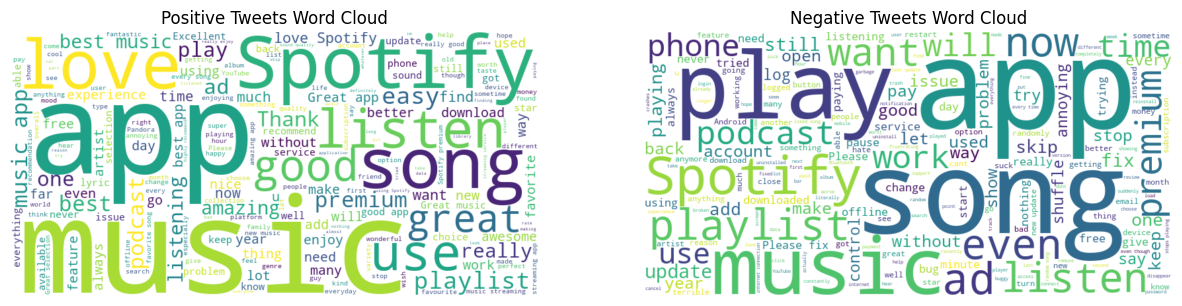

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Separate positive and negative tweets based on the 'target' column
positive_tweets = spotify[spotify['Rating'] == 5]["Review"]
negative_tweets = spotify[spotify['Rating'] == 1]["Review"]

# Sample some positive and negative tweets to create word clouds
sample_positive_text = " ".join(text for text in positive_tweets.sample(frac=0.1, random_state=23))
sample_negative_text = " ".join(text for text in negative_tweets.sample(frac=0.1, random_state=23))

# Generate word cloud images for both positive and negative sentiments
wordcloud_positive = WordCloud(width=800, height=400, max_words=200, background_color="white").generate(sample_positive_text)
wordcloud_negative = WordCloud(width=800, height=400, max_words=200, background_color="white").generate(sample_negative_text)

# Display the generated image using matplotlib
plt.figure(figsize=(15, 7))

# Positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Tweets Word Cloud')
plt.axis("off")

# Negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Tweets Word Cloud')
plt.axis("off")

plt.show()